In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import pickle


warnings.filterwarnings('ignore')

In [21]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy:', round(accuracy_score(y_test, y_pred),2))
    print('Precision:', round(precision_score(y_test, y_pred),2))
    print('Recall:', round(recall_score(y_test, y_pred),2))
    print('F1 score:', round(f1_score(y_test, y_pred),2))

## data is already preprocessed so we just need to estimate the model params

In [22]:
with open('../data/preprocessed_data.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_params_knn = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs_knn = GridSearchCV(estimator= knn, param_grid= grid_params_knn, n_jobs= -1, cv= 5)
gs_knn.fit(X_train, y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['minkowski', 'euclidean', ...], 'n_neighbors': [5, 7, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [24]:
score_knn = cross_val_score(gs_knn, X_train, y_train, scoring='f1',cv=5)
score_knn.mean()

np.float64(0.8733077492889588)

In [25]:
evaluate_model(gs_knn, X_test, y_test)

Accuracy: 0.97
Precision: 1.0
Recall: 0.93
F1 score: 0.96


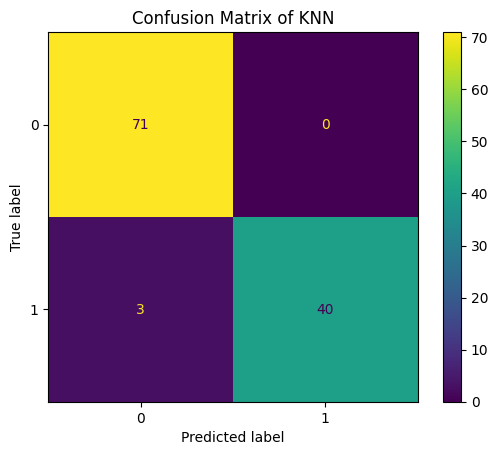

In [31]:
y_pred_knn = gs_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title("Confusion Matrix of KNN")
plt.show()